## Trabalho Prático - Módulo 4

In [1]:
# importando as bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [2]:
# importando a base de dados Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


As imagens são arrays NumPy de 28x28, com os valores de pixels entre *0 e 255*.<br>Os labels (alvo da classificação) são um array de inteiros, no intervalo de ***0 a 9***.<br>
<br>Esse intervalo corresponde com a classe de roupa que cada imagem representa.<br>

**0** - Camiseta/Top (T-shirt/top)
<br>**1** - Calça (Trouser)
<br>**2** - Suéter (Pullover)
<br>**3** - Vestido (Dress)
<br>**4** - Casaco (Coat)
<br>**5** - Sandália (Sandal)
<br>**6** - Camisa (Shirt)
<br>**7** - Tênis (Sneaker)
<br>**8** - Bolsa (Bag)
<br>**9** - Botas (Ankle boot)

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Explorando os Dados

In [4]:
print(f'train images: {len(train_images)} \ntest images: {len(test_images)}')

train images: 60000 
test images: 10000


In [5]:
print(f'train labels: {len(train_labels)} \ntest labels: {len(test_labels)}')

train labels: 60000 
test labels: 10000


In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
print(train_labels)
print(test_labels)

[9 0 0 ... 3 0 5]
[9 2 1 ... 8 1 5]


In [8]:
# todas as labels
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### Pré-processamento dos Dados

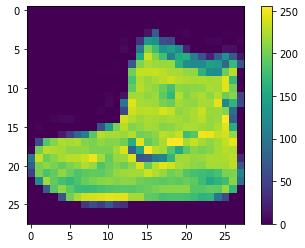

In [9]:
# plot da primeira peça da base de treino
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

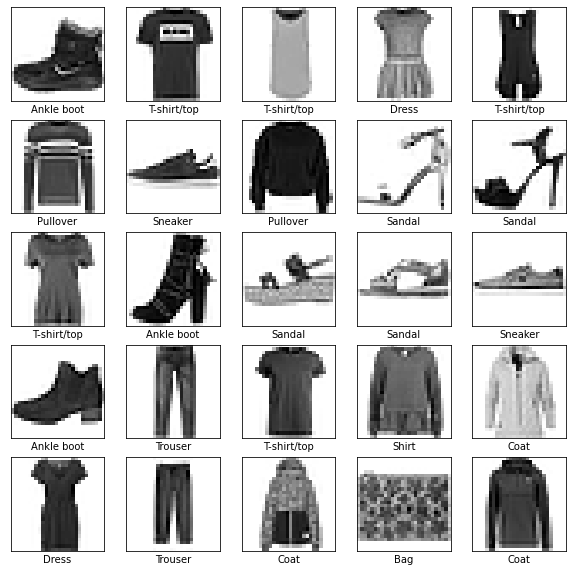

In [11]:
# visualizando as primeiras 25 imagens do conjunto de treino
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construindo o Modelo

In [12]:
# montando as camadas
model = keras.Sequential([keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
# compilando o modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
# treinando o modelo
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6119 - accuracy: 0.7872
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3821 - accuracy: 0.8608
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3357 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8883
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2940 - accuracy: 0.8898
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2719 - accuracy: 0.8990
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2708 - accuracy: 0.8985
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2447 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [16]:
# avaliando a acurácia
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3317 - accuracy: 0.8795

Test accuracy: 0.8794999718666077


In [17]:
# realizando as predições com o dataset de teste
predictions = model.predict(test_images)

In [18]:
# selecionando a primeira imagem do teste
predictions[0]

array([9.5048181e-06, 2.5885441e-10, 4.7438591e-09, 5.7873162e-10,
       1.6435386e-07, 7.4306591e-03, 5.4315010e-09, 2.8910309e-02,
       7.2064104e-08, 9.6364921e-01], dtype=float32)

In [19]:
# a classe com maior probabilidade da primeira imagem
np.argmax(predictions[0])

9

In [20]:
# função para plot da imagem
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# função para plot com as probabilidades
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

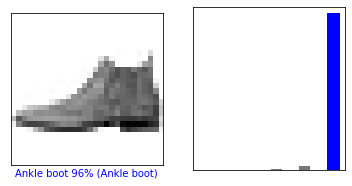

In [21]:
# predição correta
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

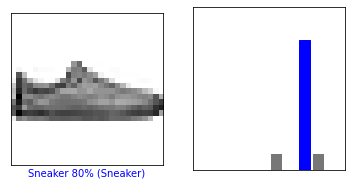

In [22]:
# predição incorreta
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

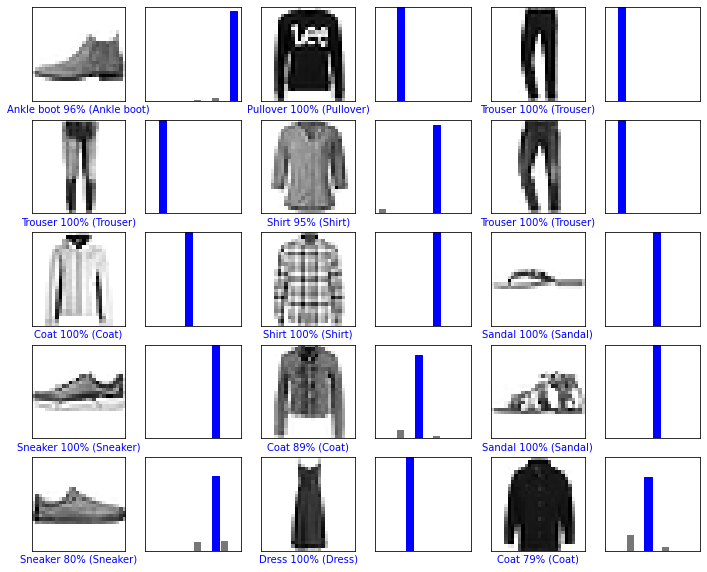

In [23]:
# labels preditas corretamente são azuis e as predições erradas são vermelhas
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [24]:
# selecionando apenas uma imagem teste
img = test_images[0]
print('Shape da imagem de exemplo:', img.shape)

# adiciona a imagem em um batch que possui um só membro
img = (np.expand_dims(img,0))
print('Imagem no formato de entrada para a Rede Neural:', img.shape)
predictions_single = model.predict(img)
print('Array com as probabilidades de cada classe:\n', predictions_single)

Shape da imagem de exemplo: (28, 28)
Imagem no formato de entrada para a Rede Neural: (1, 28, 28)
Array com as probabilidades de cada classe:
 [[9.5047826e-06 2.5885544e-10 4.7438595e-09 5.7872951e-10 1.6435405e-07
  7.4306563e-03 5.4314917e-09 2.8910300e-02 7.2063976e-08 9.6364933e-01]]


A classe prevista é: 9


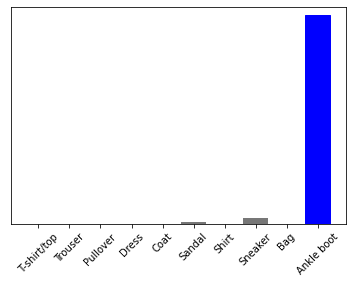

In [25]:
print('A classe prevista é:', np.argmax(predictions_single[0]))

# plot com as probabilidades de cada classe
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)